In [1]:
import os
os.chdir("../..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fix_data import add_label_T
import sklearn.feature_selection as fs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.manifold import MDS, Isomap, TSNE, LocallyLinearEmbedding

In [3]:
hcc_smarts_df_train = pd.read_csv("data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", sep = " ")
mcf_smarts_df_train = pd.read_csv("data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep= " ")

hcc_smarts_df_train = add_label_T(hcc_smarts_df_train)
mcf_smarts_df_train = add_label_T(mcf_smarts_df_train)

X1 = hcc_smarts_df_train.loc[:,hcc_smarts_df_train.columns!='label']
X2 = mcf_smarts_df_train.loc[:,mcf_smarts_df_train.columns!='label']
y = hcc_smarts_df_train["label"]

### PCA 2 Components

0.47120179743014456


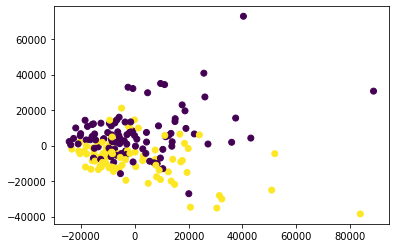

In [4]:
pca = PCA(n_components=2)
pca.fit(X1)

print(sum(pca.explained_variance_ratio_))
red_X1 = pd.DataFrame(pca.transform(X1))
plt.scatter(red_X1[0], red_X1[1], c=y)

### Multidimensional Scaling (MDS)
reduces dimensionality while trying to preserve
the distances between the instances.

c:\Users\Samuele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


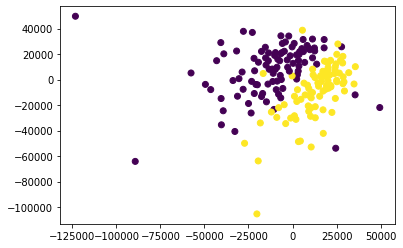

In [6]:
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X1)
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:,1], c=y)

### Isomap 
creates a graph by connecting each instance to its nearest neighbors, then
reduces dimensionality while trying to preserve the geodesic distances between
the instances.

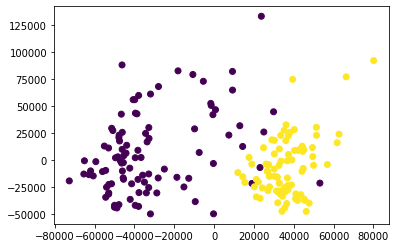

In [8]:
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X1)
plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:,1], c=y)

### t-Distributed Stochastic Neighbor Embedding (t-SNE) 
reduces dimensionality
while trying to keep similar instances close and dissimilar instances apart. It is
mostly used for visualization, in particular to visualize clusters of instances in
high-dimensional space (e.g., to visualize the MNIST images in 2D).

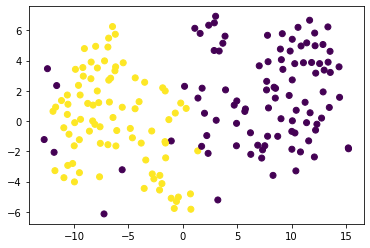

In [10]:
tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X1)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:,1], c=y)

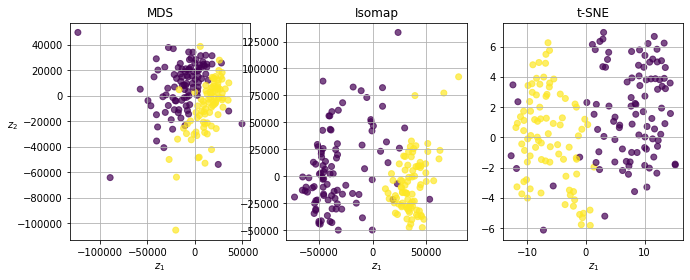

In [11]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.7)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.show()

### Locally Linear Embedding

In [13]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X1)

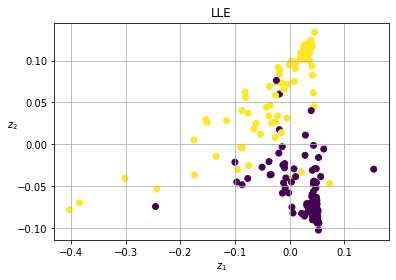

In [14]:
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=y)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)

plt.grid(True)

plt.title("LLE")
plt.show()

### Kernel PCA Rbf

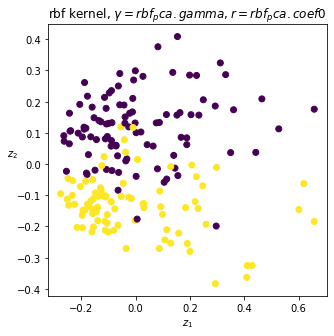

In [16]:
rbf_pca = KernelPCA(kernel="rbf", gamma=0.0000000001, coef0=1)
plt.figure(figsize=(5, 5))

rbf_pca.n_components = 2
rbf_pca.random_state = 42
X_reduced = rbf_pca.fit_transform(X1)


plt.title("rbf kernel, $\gamma={rbf_pca.gamma}, r={rbf_pca.coef0}$")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.show()

### Sigmoid Kernel

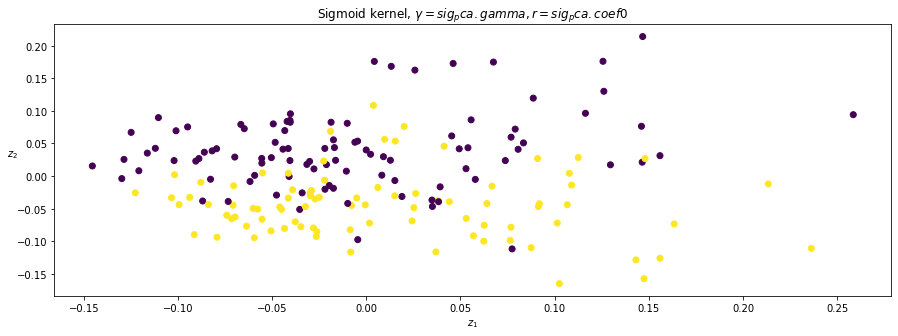

In [17]:
sig_pca = KernelPCA(kernel="sigmoid", gamma=0.0000000001, coef0=1)
plt.figure(figsize=(15, 5))

sig_pca.n_components = 2
sig_pca.random_state = 42
X_reduced = sig_pca.fit_transform(X1)


plt.title("Sigmoid kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.show()